<a href="https://colab.research.google.com/github/YaseenAli7812/ML-Classification/blob/main/Fraud_Detection_in_Financial_Transactions_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Transaction = pd.read_csv("credit_card_transactions.csv")
Transaction

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [ ]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
Transaction.isnull().sum()/len(Transaction)

,0
Unnamed: 0,0.000000
trans_date_trans_time,0.000000
cc_num,0.000000
merchant,0.000000
category,0.000000
amt,0.000000
first,0.000000
last,0.000000
gender,0.000000
street,0.000000


In [ ]:
Transaction.drop(columns=['merch_zipcode'],inplace = True)

In [ ]:
Transaction.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

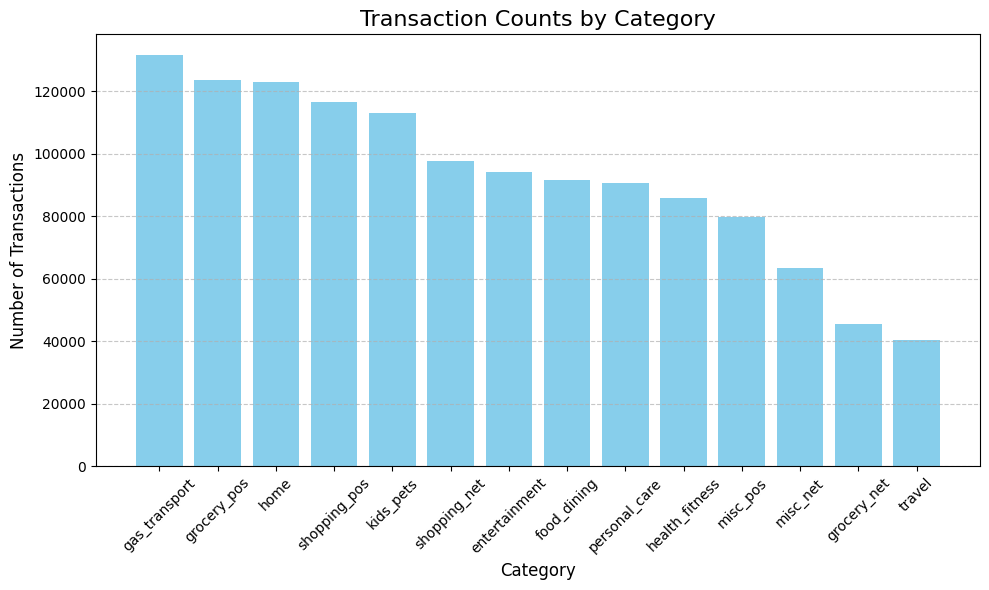

In [ ]:
category_counts=Transaction.category.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Transaction Counts by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
Transaction['trans_date_trans_time'] = pd.to_datetime(Transaction['trans_date_trans_time'])

# Extract the month and year in MMYY format
Transaction['monthyear'] = Transaction['trans_date_trans_time'].dt.strftime('%m%y')

In [ ]:
Transaction.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,monthyear
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0119
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0119
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0119
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0119
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0119


**Creating rolling sum features total_amt_last_7_days and category_avg_amt_last_10_transactions**

In [ ]:
# Sort data by card number and transaction time
cctrans_df = Transaction.sort_values(by=['cc_num', 'trans_date_trans_time'])
data = pd.DataFrame()
data['total_amt_last_7_days'] = (
    cctrans_df
    .set_index('trans_date_trans_time')  # Temporarily set time as the index
    .groupby('cc_num')['amt']            # Group by credit card number
    .rolling('7D', closed='right')       # Apply a time-based rolling window
    .sum()                      # Ensure correct alignment with original index
)
data.reset_index(level=0,inplace=True)
data.reset_index(inplace=True)

cctrans_df = pd.merge(
    cctrans_df,                # First DataFrame
    data,                # Second DataFrame
    on=['trans_date_trans_time', 'cc_num'],  # List of columns to join on
    how='inner'         # Type of join: 'inner', 'left', 'right', or 'outer'
)

In [ ]:
cctrans_df['category_avg_amt_last_10_transactions'] = cctrans_df.groupby(['cc_num', 'category'])['amt'].apply(lambda x: x.rolling(window=10, min_periods=1).mean()).reset_index(level=[0, 1], drop=True)

**Deriving a feature category_frequency_last_month to find out the frequency of purchanse of each category by each user**

In [ ]:
# Add a column for transaction month
cctrans_df['month'] = cctrans_df['trans_date_trans_time'].dt.to_period('M')

# Count the frequency of transactions per category in the last month
cctrans_df['category_frequency_last_month'] = (
    cctrans_df.groupby(['cc_num', 'category', 'month'])['category']
    .transform('count')
)

**let's one hot encode user demographic feature like gender**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Gender' column
encoded_gender = encoder.fit_transform(cctrans_df[['gender']])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(
    encoded_gender,
    columns=encoder.get_feature_names_out(['gender'])
)

encoded_df.gender_F = encoded_df.gender_F.astype(int)
encoded_df.gender_M = encoded_df.gender_M.astype(int)

cctrans_df = pd.concat([cctrans_df, encoded_df], axis=1)
cctrans_df = cctrans_df.drop(columns=['gender'])

**One hot encoding merchant category**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Gender' column
encoded_cat = encoder.fit_transform(cctrans_df[['category']])

# Create a DataFrame for the encoded columns
encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(['category'])
)

encoded_cat_df = encoded_cat_df.astype(int)

cctrans_df = pd.concat([cctrans_df, encoded_cat_df], axis=1)
cctrans_df = cctrans_df.drop(columns=['category'])

In [ ]:
cctrans_df['Age'] = pd.to_datetime('today').year - pd.to_datetime(cctrans_df['dob']).dt.year


In [ ]:
cctrans_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Age
0,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",7.27,Mary,Diaz,9886 Anita Drive,Fort Washakie,WY,...,0,0,0,1,0,0,0,0,0,38
1,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,52.94,Mary,Diaz,9886 Anita Drive,Fort Washakie,WY,...,0,0,0,0,0,0,0,0,0,38
2,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,82.08,Mary,Diaz,9886 Anita Drive,Fort Washakie,WY,...,0,0,0,0,0,0,0,0,0,38
3,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,34.79,Mary,Diaz,9886 Anita Drive,Fort Washakie,WY,...,0,0,1,0,0,0,0,0,0,38
4,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,27.18,Mary,Diaz,9886 Anita Drive,Fort Washakie,WY,...,0,1,0,0,0,0,0,0,0,38


**Dropping columns with large number of categories and highly correlated columns**

In [ ]:
cctrans_df.drop(columns = ['Unnamed: 0','merchant','first','last','street','city','zip','dob','job','trans_num','state','month'],inplace = True)

**Data scaling for all numerical columns before passing it through the model**

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long','monthyear',
       'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
       'category_frequency_last_month','Age']
print(numerical_cols)
scaler = StandardScaler()

cctrans_df[numerical_cols] = scaler.fit_transform(cctrans_df[numerical_cols])

['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'monthyear', 'total_amt_last_7_days', 'category_avg_amt_last_10_transactions', 'category_frequency_last_month', 'Age']


**Final set of columns that will be passed through the column.**

In [ ]:
cctrans_df.columns

Index(['trans_date_trans_time', 'cc_num', 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'monthyear',
       'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
       'category_frequency_last_month', 'gender_F', 'gender_M',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'Age'],
      dtype='object')

**Our target column is the is_fraud column which contains binary value 0 and 1.
Looking at the bar graph we can see that the target column is higly imbalanced.
We will go with stratified split and also use class weightage to train the model in later stages.**

<ipython-input-20-91bda337e5ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=cctrans_df, palette='viridis')


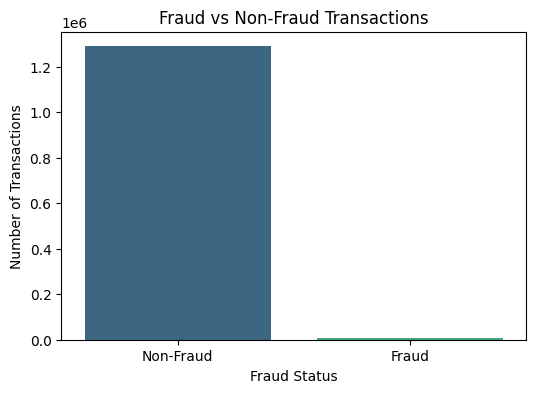

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))

# Create the bar plot with Seaborn
sns.countplot(x='is_fraud', data=cctrans_df, palette='viridis')

# Set the plot title and labels
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud Status')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)

# Display the plot
plt.show()

**Creating sequence**

**Let us create the sequence before passing it through the LSTM model.
We will be using a sequence length of 20 to provide enough information to LSTM but we can experiment around sequence length for better predictions.**

In [ ]:
# Define sequence length
SEQUENCE_LENGTH = 20

# Sort transactions by credit card number and time
cctrans_df = cctrans_df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Features for the LSTM
features = [
    'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long',
    'monthyear', 'total_amt_last_7_days', 'category_avg_amt_last_10_transactions',
    'category_frequency_last_month', 'gender_F', 'gender_M', 'category_entertainment',
    'category_food_dining', 'category_gas_transport', 'category_grocery_net',
    'category_grocery_pos', 'category_health_fitness', 'category_home',
    'category_kids_pets', 'category_misc_net', 'category_misc_pos',
    'category_personal_care', 'category_shopping_net', 'category_shopping_pos',
    'category_travel', 'Age'
]
# Normalize the features
#scaler = MinMaxScaler()
#cctrans_df[features] = scaler.fit_transform(cctrans_df[features])

# Prepare sequences
def create_sequences(df, seq_length, feature_columns, target_column):
    sequences = []
    labels = []

    # Group by credit card number
    grouped = df.groupby('cc_num')
    for _, group in grouped:
        data = group[feature_columns].values
        target = group[target_column].values

        # Generate sequences
        for i in range(len(group) - seq_length + 1):
            sequences.append(data[i:i+seq_length])
            labels.append(target[i+seq_length-1])  # Label is the last element in the sequence

    return np.array(sequences), np.array(labels)

# Create sequences
X, y = create_sequences(cctrans_df, SEQUENCE_LENGTH, features, 'is_fraud')

# Check shapes
print(f"Input shape: {X.shape}")  # (samples, timesteps, features)
print(f"Labels shape: {y.shape}")  # (samples,)

Input shape: (1278722, 20, 28)
Labels shape: (1278722,)


**Train test split
Creating train test split with stratified = y**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example: Sequences and targets
# sequences.shape = (num_samples, sequence_length, num_features)
# targets.shape = (num_samples,)
print(X.shape)  # e.g., (10000, 12, 20)
print(y.shape)   # e.g., (10000,)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert targets to categorical (if classification and multi-class)
# Not needed if it's binary classification
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

(1278722, 20, 28)
(1278722,)


**LSTM model creation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define model
model = Sequential()

# LSTM layer
model.add(LSTM(64, input_shape=(20, 28), return_sequences=False))  # Use True for stacked LSTMs

# Optional Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Dense output layer
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

**Fitting the model**

In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,            # Number of passes through the dataset
    batch_size=10000,        # Number of samples per batch
    verbose=1             # Prints training progress
)

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Print metrics
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}")
    print(f"  Training loss: {train_loss[epoch]:.4f}, Training
    accuracy: {train_accuracy[epoch]:.4f}")
    print(f"  Validation loss: {val_loss[epoch]:.4f}, Validation accuracy: {val_accuracy[epoch]:.4f}")

**Key Findings**
The Loss and and accuracy plots suggest very good outcome of the model.
**The graph shows that the model is neither overfitting not underfitting**

In [ ]:
import matplotlib.pyplot as plt

# Keras example (same for PyTorch if you track metrics manually)
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

**ROC AUC curve**

The ROC AUC is widely used for binary classification tasks, especially with imbalanced datasets, as it evaluates the model's ability to distinguish between classes.

In [ ]:
1.0: Perfect model.
0.5: Random guess (no discrimination ability).
< 0.5: Model performs worse than random guessing.

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Get predictions for validation data
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Confusion Matrix**

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The model performs exceptionally well for non-fraud transactions (class 0). Performance for fraud detection (class 1) is less robust, with a recall of 61%, meaning many fraud cases are missed.

Class imbalance skews the overall metrics, especially accuracy and weighted averages, which may overstate model effectiveness.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

sklearn_precision = precision_score(y_test, y_pred_classes)
sklearn_recall = recall_score(y_test, y_pred_classes)
sklearn_f1 = f1_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes, target_names=["Class 0 (Non-Fraud)", "Class 1 (Fraud)"])

print("\nUsing sklearn.metrics:")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")
print(f"F1-Score: {sklearn_f1:.2f}")

print("\nClassification Report:\n", report)

**Training the LSTM model using class weightage metrics to balance the outcome variable**

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert class_weights into a dictionary
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(class_weight_dict)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define model
bal_model = Sequential()

# LSTM layer
bal_model.add(LSTM(64, input_shape=(20, 28), return_sequences=False))  # Use True for stacked LSTMs

# Optional Dropout layer to prevent overfitting
bal_model.add(Dropout(0.2))

# Dense output layer
bal_model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' for binary classification

# Compile the model
bal_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
bal_model.summary()


In [ ]:
class_weights = {0: 0.5026023877034921, 1: 96.56562452801691}

# Fit the model
history = bal_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,            # Number of passes through the dataset
    batch_size=10000,        # Number of samples per batch
    verbose=1,             # Prints training progress
    class_weight=class_weights
)

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
# Print metrics
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}")
    print(f"  Training loss: {train_loss[epoch]:.4f}, Training accuracy: {train_accuracy[epoch]:.4f}")
    print(f"  Validation loss: {val_loss[epoch]:.4f}, Validation accuracy: {val_accuracy[epoch]:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Keras example (same for PyTorch if you track metrics manually)
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for validation data
y_pred_probs = bal_model.predict(X_test)  # Predict probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

sklearn_precision = precision_score(y_test, y_pred_classes)
sklearn_recall = recall_score(y_test, y_pred_classes)
sklearn_f1 = f1_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes, target_names=["Class 0 (Non-Fraud)", "Class 1 (Fraud)"])

print("\nUsing sklearn.metrics:")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")
print(f"F1-Score: {sklearn_f1:.2f}")

print("\nClassification Report:\n", report)

**Conclusion**

The above classification report suggests that though the recall has improved the precision has gone down drastically. This increases the chances of worng fraud detection and transaction denial.

**Looking at the two classification report we can say that the first model performed better due it's better precision.**

There are many possible ways through which the model can be improved. When improving an LSTM model for imbalanced classification tasks like fraud detection, several steps can be taken to enhance performance. Based on my experiments with stratified splits and class weighting, the following strategies could further improve the model:

**Improving Data Balancing**
**Oversampling the Minority Class:** Techniques like SMOTE (Synthetic Minority Oversampling Technique) can be used to generate synthetic samples for fraud cases, balancing the dataset. This ensures that the model gets enough exposure to fraud transactions.

**Undersampling the Majority Class:** Reducing the number of non-fraud transactions during training can help create a balanced dataset while preserving minority class information.

**Dynamic Resampling:** Performing resampling during each training epoch allows for balanced batches without altering the original data distribution.

**Optimizing Class Weights**
Fine-tuning class weights, beyond the initial values, helps balance the trade-off between precision (to reduce false positives) and recall (to capture fraud cases).

Metrics like F1-score or AUC-ROC can guide the selection of optimal class weights.

Feature engineering and Hyperparameter tuning
We can use PCA to provide dimesionlity reduction. we can use embedding technique for categorical variables like city, zip etc. Introducing L1 and L2 regularization and experiment around learning rates, batch sizes and sequence length for better performance.

**Advanced Architectures**
**Attention Mechanisms:** Adding attention layers to LSTMs can help focus on critical parts of the sequence, improving fraud detection.

**Hybrid Models:** Combining LSTM with Convolutional Neural Networks (CNNs) can capture both temporal and spatial data relationships.

**Autoencoders:** Use LSTM-based autoencoders to model normal transactions and identify outliers as potential fraud cases.